In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
import copy
from scipy import optimize as opt
from altmin_pca import pca, quadratically_regularized_pca, sparse_pca

In [2]:
all_bursts=np.load('all_bursts.npy')
ncomps=20
burst_std=RobustScaler().fit_transform(all_bursts)
pca = PCA(n_components=ncomps)
pcs = pca.fit_transform(burst_std)

0.671647305526081


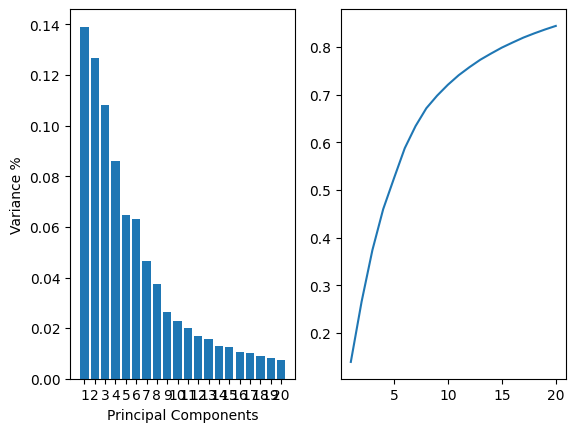

In [3]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.figure(facecolor='w')
plt.subplot(1,2,1)
plt.bar(PC, pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

plt.subplot(1,2,2)
plt.plot(range(1,len(PC)+1),pca.explained_variance_ratio_.cumsum())

pcs_to_analyze=20
print(pca.explained_variance_ratio_.cumsum()[7])

In [4]:
[W,C]=pca(burst_std, ncomps)

PC1: iterations=59, error=251.54447346794183
PC2: iterations=16, error=232.32718662270958
PC3: iterations=21, error=214.5668879466892
PC4: iterations=28, error=199.30732373279298
PC5: iterations=13, error=187.28788826898858
PC6: iterations=14, error=174.1370127817471
PC7: iterations=38, error=164.01563957828688
PC8: iterations=14, error=155.39126022150035
PC9: iterations=14, error=149.00757309613874
PC10: iterations=20, error=143.26411630294547
PC11: iterations=24, error=138.0381872194706
PC12: iterations=54, error=133.46720861254292
PC13: iterations=21, error=129.11003215712205
PC14: iterations=17, error=125.33728762271717
PC15: iterations=27, error=121.6424876206944
PC16: iterations=13, error=118.3663335526485
PC17: iterations=26, error=115.11226664358747
PC18: iterations=41, error=112.26010858602466
PC19: iterations=24, error=109.54988022731355
PC20: iterations=27, error=106.99659805054725


Text(0, 0.5, 'optimized PCA')

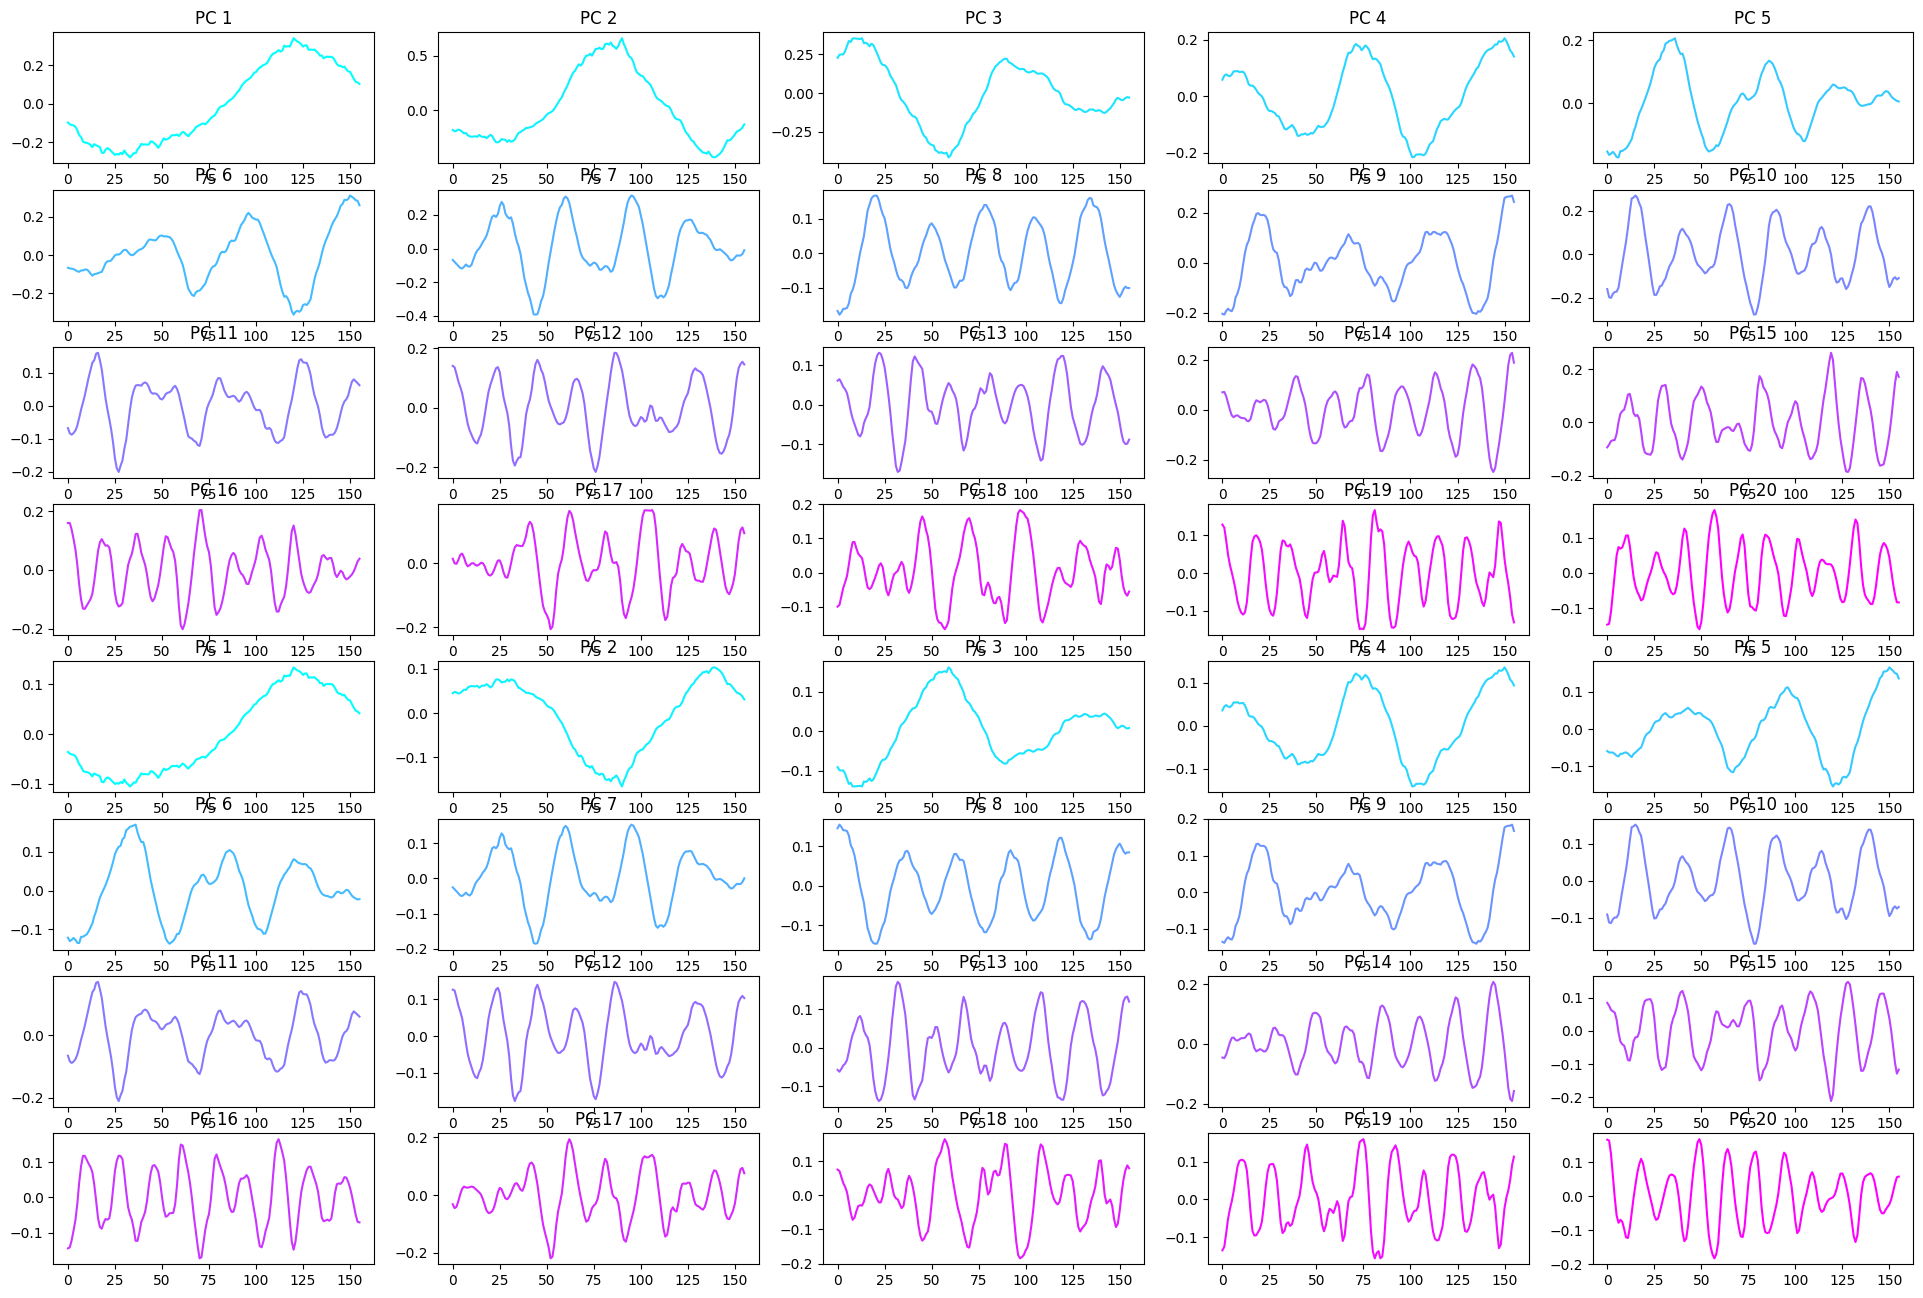

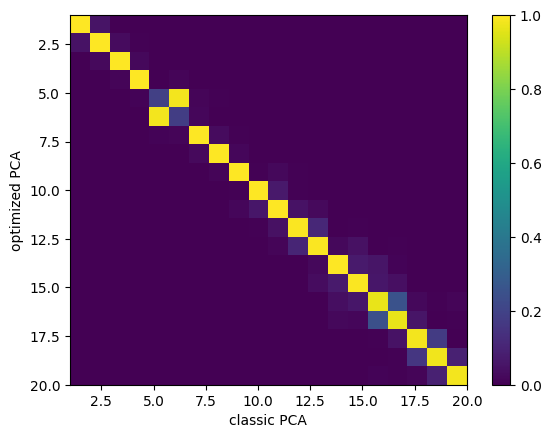

In [5]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')


In [6]:
[W,C]=quadratically_regularized_pca(burst_std, ncomps, alpha=50)

PC1: iterations=49, error=256.465943513559
PC2: iterations=14, error=242.84799812363582
PC3: iterations=25, error=231.38545807401889
PC4: iterations=25, error=222.98742263994893
PC5: iterations=14, error=218.12850555583336
PC6: iterations=14, error=212.89318694177925
PC7: iterations=25, error=210.71586748696342
PC8: iterations=7, error=210.69563440901868
PC9: iterations=6, error=210.65801329961093
PC10: iterations=7, error=210.60427492325672
PC11: iterations=7, error=210.55714596018834
PC12: iterations=7, error=210.3771661604096
PC13: iterations=5, error=210.28411821193404
PC14: iterations=7, error=210.22553447558056
PC15: iterations=7, error=210.199649814297
PC16: iterations=7, error=210.17919872003074
PC17: iterations=9, error=210.15369343037233
PC18: iterations=28, error=210.1102919634725
PC19: iterations=11, error=210.08506829604937
PC20: iterations=6, error=209.9945560363599


Text(0, 0.5, 'optimized PCA')

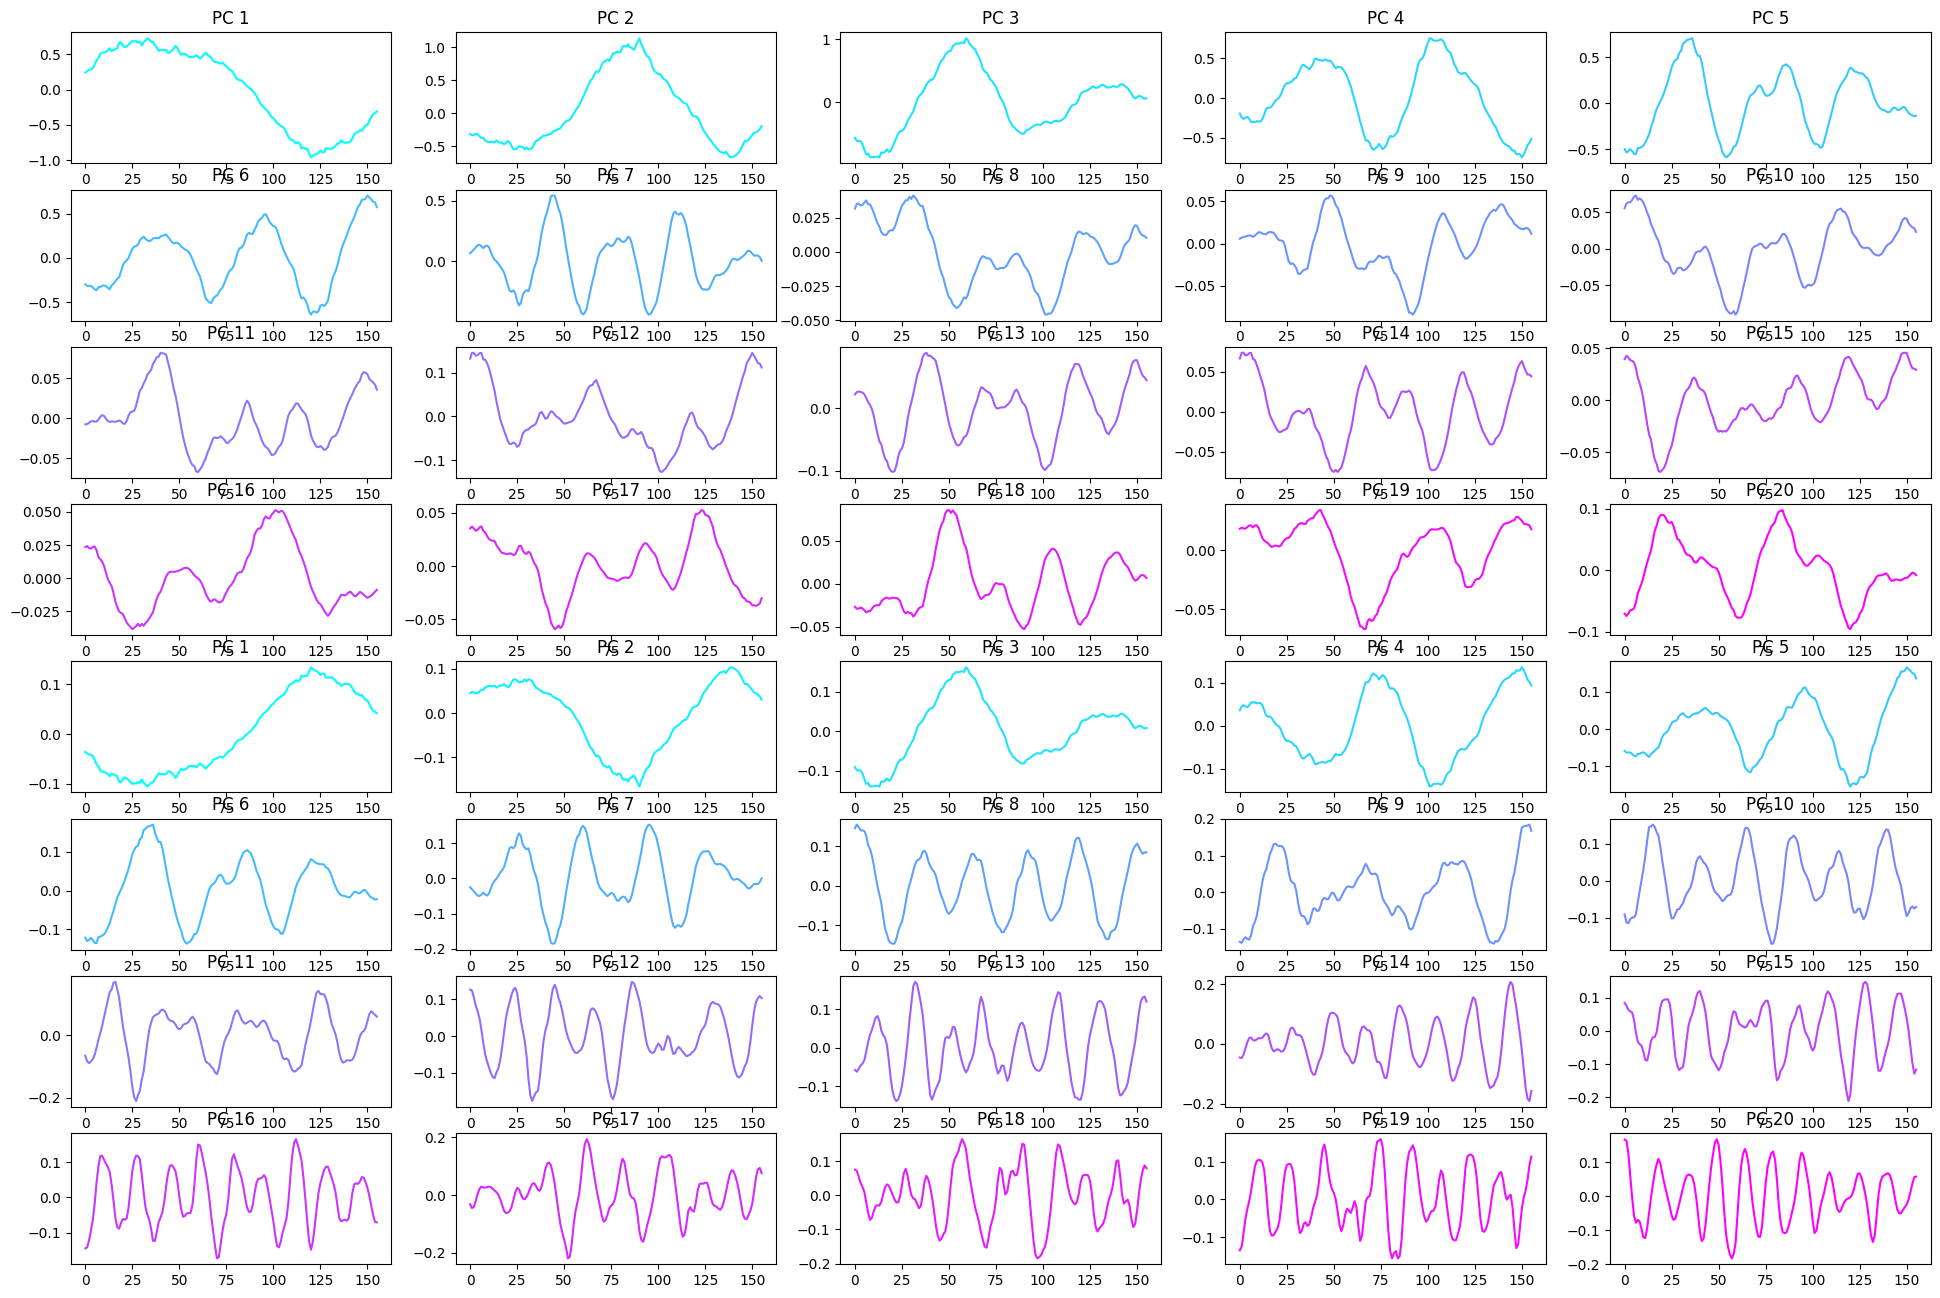

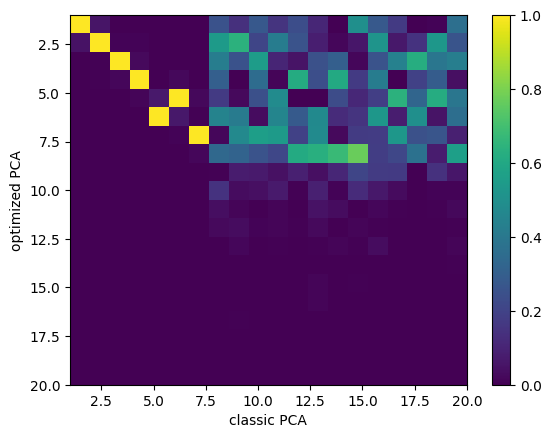

In [7]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')

In [8]:
[W,C]=sparse_pca(burst_std, ncomps, alpha=20)

PC1: iterations=13, error=254.309122894323
PC2: iterations=13, error=254.27574546661526
PC3: iterations=26, error=235.39206654794424
PC4: iterations=41, error=218.9766887247652
PC5: iterations=16, error=218.87312687914545
PC6: iterations=16, error=218.79405105416254
PC7: iterations=29, error=205.8536939354375
PC8: iterations=16, error=205.73975419688176
PC9: iterations=23, error=203.99831827096878
PC10: iterations=16, error=203.8300996640275
PC11: iterations=17, error=203.65148430520702
PC12: iterations=16, error=203.5399029548727
PC13: iterations=14, error=203.48990266826763
PC14: iterations=13, error=203.4658324305565
PC15: iterations=30, error=194.2901196981323
PC16: iterations=13, error=194.24385689806888
PC17: iterations=19, error=193.82125523784032
PC18: iterations=13, error=193.79579468549062
PC19: iterations=14, error=193.74890066663033
PC20: iterations=12, error=193.73645246002545


Text(0, 0.5, 'optimized PCA')

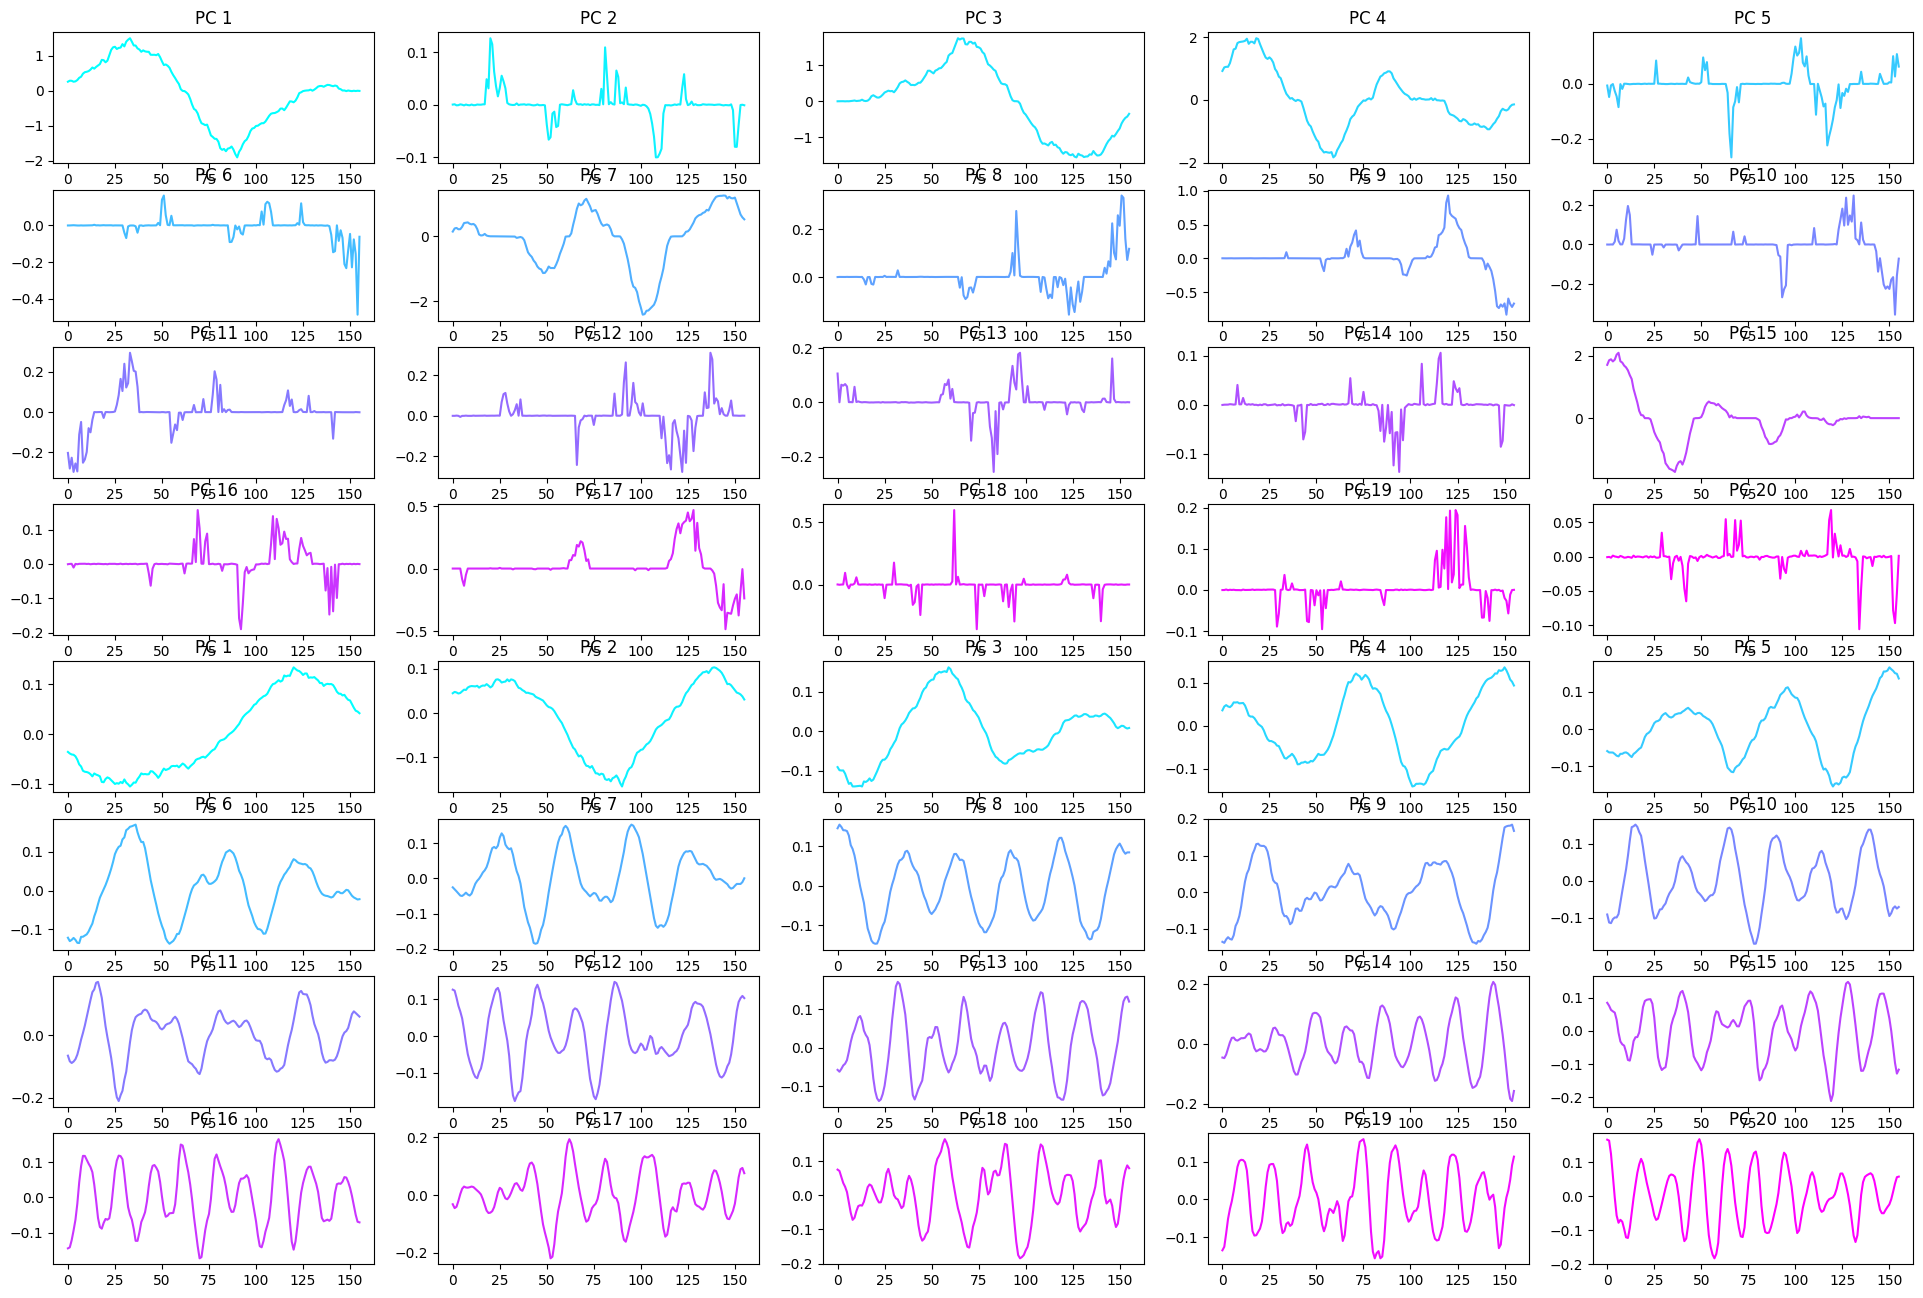

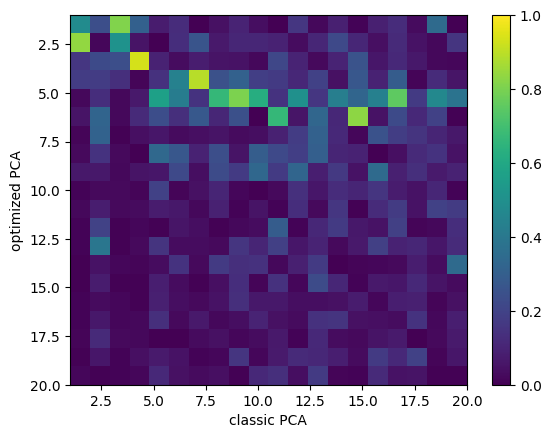

In [9]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')